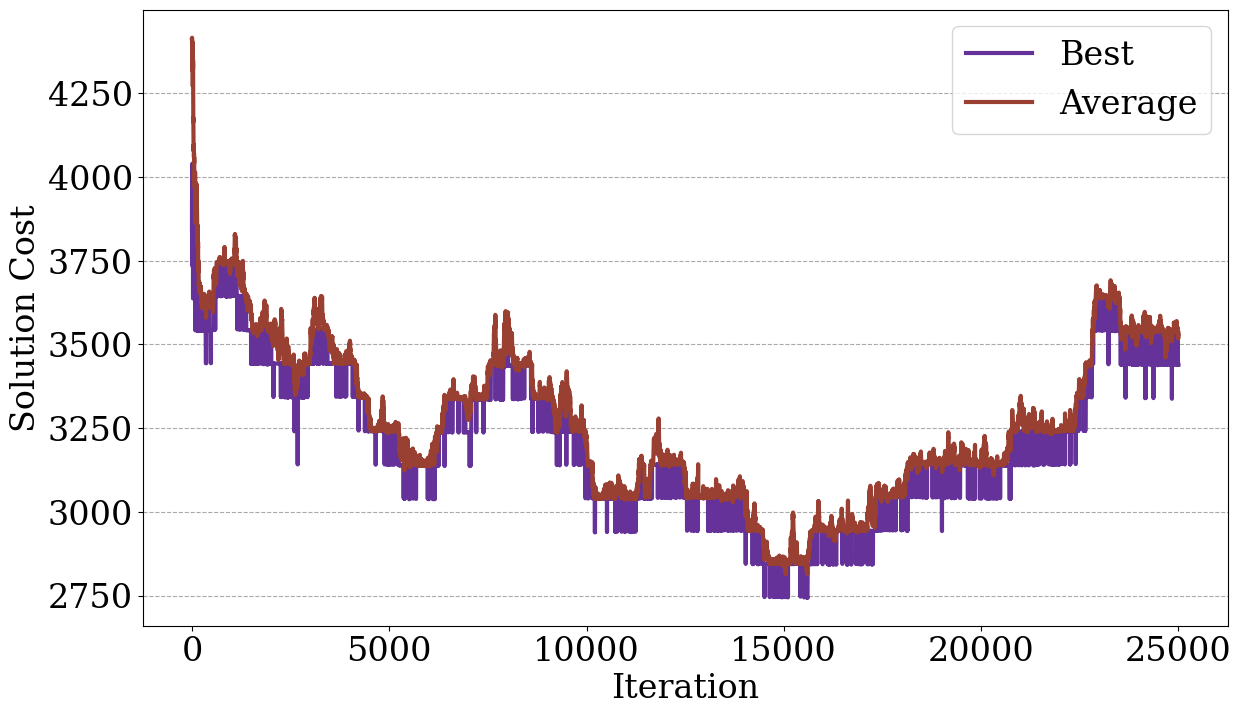

In [50]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

prefix = "basic"
it = 0

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "random"+str(it)+"_10_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog10 = pd.DataFrame(dataPkt)

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "random"+str(it)+"_30_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog30 = pd.DataFrame(dataPkt)

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "random"+str(it)+"_50_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog50 = pd.DataFrame(dataPkt)

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "random"+str(it)+"_70_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog70 = pd.DataFrame(dataPkt)

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "random"+str(it)+"_90_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog90 = pd.DataFrame(dataPkt)

fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#994032'
color3 = '#993280'
color4 = '#993242'
color5 = '#853299'
alpha = 0.6

ax1.plot(pdLog70['gen'], pdLog70['bestCost'], color1, linewidth=3, label='Best', zorder=6)
# ax1.plot(pdLog30['gen'], pdLog30['bestCost'], linewidth=3, label='30% Crossover', zorder=6)
# ax1.plot(pdLog50['gen'], pdLog50['bestCost'], linewidth=3, label='50% Crossover', zorder=6)
# ax1.plot(pdLog70['gen'], pdLog70['bestCost'], linewidth=3, label='70% Crossover', zorder=6)
# ax1.plot(pdLog90['gen'], pdLog90['bestCost'], linewidth=3, label='90% Crossover', zorder=6)
ax1.plot(pdLog70['gen'], pdLog70['avgCost'], color=color2, linewidth=3, label='Average', zorder=6)
# ax1.plot(pdLog['it'], pdLog['currCost'], color=color2, linewidth=5, alpha=0.8, label='Current', zorder=5)

ax1.set_xlabel("Iteration")
ax1.set_ylabel("Solution Cost")
# ax1.set_ylim(430, 490)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
ax1.legend(bars, labels, loc='best')
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

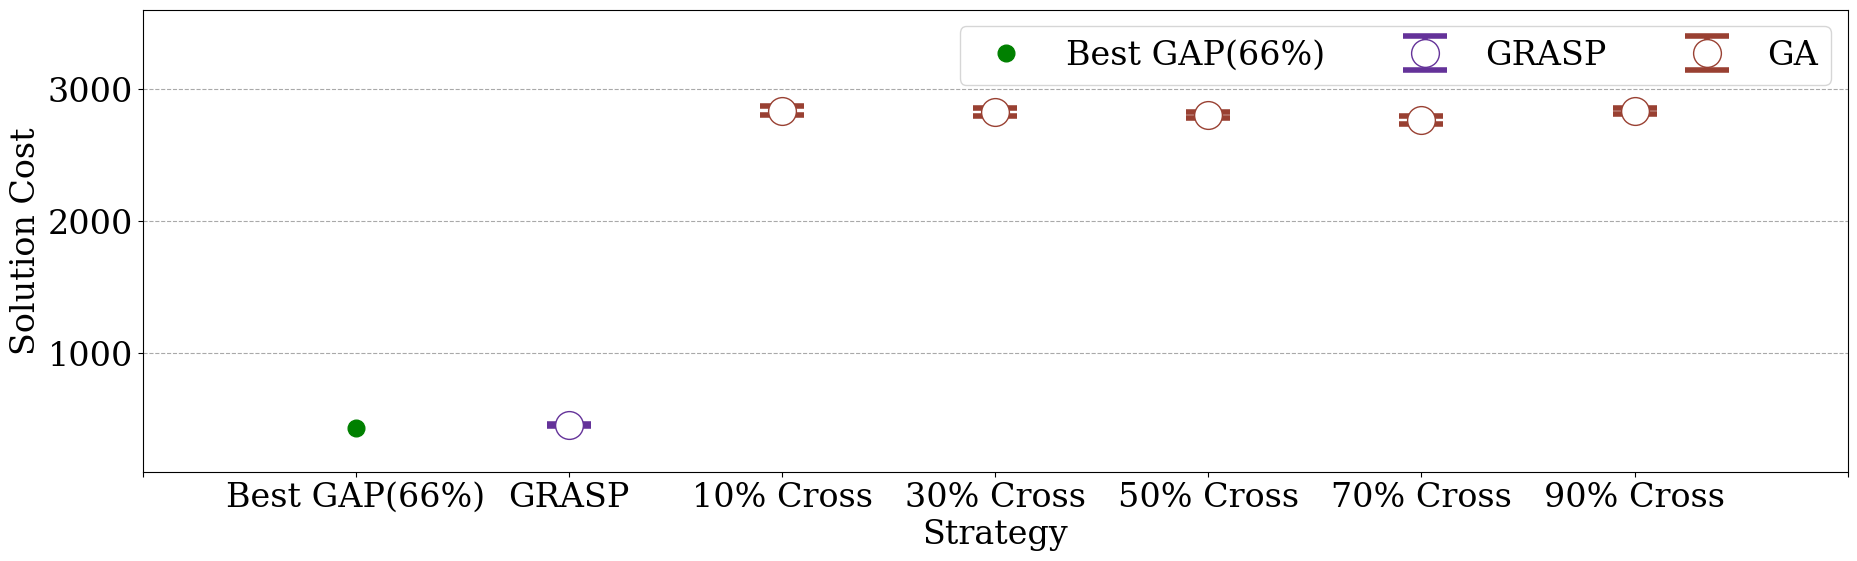

In [40]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_basic = []
error_basic = []
means_half = []
error_half = []
means_smart = []
error_smart = []
indexes = []

pathCWD = os.getcwd() + "/output/"

pathFile = pathCWD + "biobj_gap_solutions.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
dfBest = pd.DataFrame(dataPkt)

dfBest = dfBest.loc[dfBest['numDevices'] == 80]
dfBest = dfBest.loc[dfBest['numVirtualPositions'] == 64]

costs_basic = []
costs_ga10 = []
costs_ga30 = []
costs_ga50 = []
costs_ga70 = []
costs_ga90 = []

for i in range(0,30):

    # ---- Random Diversification ----
    pathFile = pathCWD + "grasp" + str(i) + "_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    costs_basic.append(dfLog.loc[dfLog['it'] == 49999]['bestCost'].array)
    
    # ---- Random Diversification ----
    pathFile = pathCWD + "random" + str(i) + "_10_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga10.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_30_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga30.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_50_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga50.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_70_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga70.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_90_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga90.append(dfLog['bestCost'].iloc[0])
    

means_basic.append(np.mean(costs_basic))
error_basic.append(np.std(costs_basic)/np.sqrt(len(costs_basic)))

# means_half.append(np.mean(costs_half))
# error_half.append(np.std(costs_half)/np.sqrt(len(costs_half)))

fig, ax1 = plt.subplots(figsize=(22, 6))

color1 = '#643299'
color2 = '#994032'
color3 = '#993280'
color4 = '#993242'
color5 = '#853299'
alpha = 0.6

ax1.errorbar(2, means_basic, error_basic, color=color1, mfc='white', marker='o', markersize=20,
             linestyle='', label='GRASP', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(3, np.mean(costs_ga10), np.std(costs_ga10)/np.sqrt(len(costs_ga10)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', label='GA', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(4, np.mean(costs_ga30), np.std(costs_ga30)/np.sqrt(len(costs_ga30)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(5, np.mean(costs_ga50), np.std(costs_ga50)/np.sqrt(len(costs_ga50)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(6, np.mean(costs_ga70), np.std(costs_ga70)/np.sqrt(len(costs_ga70)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(7, np.mean(costs_ga90), np.std(costs_ga90)/np.sqrt(len(costs_ga90)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.errorbar(3, means_half, error_half, color=color3, mec='white', marker='X', markersize=20,
#              linestyle='', label='Smart Diver.', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.errorbar(range(len(means_smart)), means_smart, error_smart, color=color2, mec='white', marker='D', markersize=16,
#              linestyle='', label='Smart', capsize=16, lw=4, capthick=4, zorder=4)
ax1.plot(1, dfBest.loc[dfBest['seed'] == 1]['objective'], linestyle="", color="green", marker="o", markersize=12, label='Best GAP(66%)', zorder=4)

ax1.set_xticks([0,1,2,3,4,5,6,7,8], ["", "Best GAP(66%)", "GRASP", "10% Cross", "30% Cross", "50% Cross", "70% Cross", "90% Cross", ""])
ax1.set_xlabel("Strategy")
ax1.set_ylabel("Solution Cost")
ax1.tick_params(axis='y', which='major')
ax1.set_ylim(100, 3600)
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
plt.legend(loc='best', ncol=4)
# fig.suptitle('Solving Time by Number of Virtual Positions')
# plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

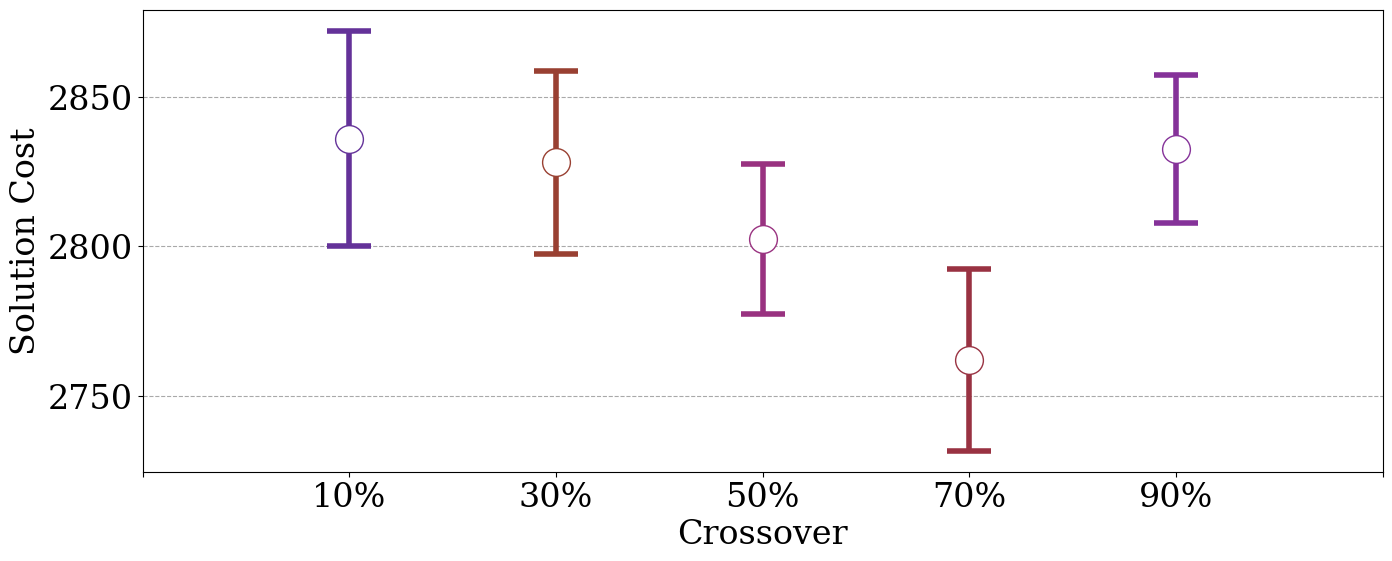

In [45]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_basic = []
error_basic = []
means_half = []
error_half = []
means_smart = []
error_smart = []
indexes = []

pathCWD = os.getcwd() + "/output/"

pathFile = pathCWD + "biobj_gap_solutions.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
dfBest = pd.DataFrame(dataPkt)

dfBest = dfBest.loc[dfBest['numDevices'] == 80]
dfBest = dfBest.loc[dfBest['numVirtualPositions'] == 64]

costs_basic = []
costs_ga10 = []
costs_ga30 = []
costs_ga50 = []
costs_ga70 = []
costs_ga90 = []

for i in range(0,30):

    # ---- Random Diversification ----
    pathFile = pathCWD + "grasp" + str(i) + "_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    costs_basic.append(dfLog.loc[dfLog['it'] == 49999]['bestCost'].array)
    
    # ---- Random Diversification ----
    pathFile = pathCWD + "random" + str(i) + "_10_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga10.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_30_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga30.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_50_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga50.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_70_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga70.append(dfLog['bestCost'].iloc[0])
    
    pathFile = pathCWD + "random" + str(i) + "_90_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.sort_values(by=['bestCost'], ascending=True, inplace=True)
    costs_ga90.append(dfLog['bestCost'].iloc[0])
    

means_basic.append(np.mean(costs_basic))
error_basic.append(np.std(costs_basic)/np.sqrt(len(costs_basic)))

# means_half.append(np.mean(costs_half))
# error_half.append(np.std(costs_half)/np.sqrt(len(costs_half)))

fig, ax1 = plt.subplots(figsize=(16, 6))

color1 = '#643299'
color2 = '#994032'
color3 = '#993280'
color4 = '#993242'
color5 = '#853299'
alpha = 0.6

# ax1.errorbar(2, means_basic, error_basic, color=color1, mfc='white', marker='o', markersize=20,
#              linestyle='', label='GRASP', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(1, np.mean(costs_ga10), np.std(costs_ga10)/np.sqrt(len(costs_ga10)), color=color1, mfc='white', marker='o', markersize=20,
             linestyle='', label='GA', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(2, np.mean(costs_ga30), np.std(costs_ga30)/np.sqrt(len(costs_ga30)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(3, np.mean(costs_ga50), np.std(costs_ga50)/np.sqrt(len(costs_ga50)), color=color3, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(4, np.mean(costs_ga70), np.std(costs_ga70)/np.sqrt(len(costs_ga70)), color=color4, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(5, np.mean(costs_ga90), np.std(costs_ga90)/np.sqrt(len(costs_ga90)), color=color5, mfc='white', marker='o', markersize=20,
             linestyle='', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.errorbar(3, means_half, error_half, color=color3, mec='white', marker='X', markersize=20,
#              linestyle='', label='Smart Diver.', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.errorbar(range(len(means_smart)), means_smart, error_smart, color=color2, mec='white', marker='D', markersize=16,
#              linestyle='', label='Smart', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.plot(1, dfBest.loc[dfBest['seed'] == 1]['objective'], linestyle="", color="green", marker="o", markersize=12, label='Best GAP(66%)', zorder=4)

ax1.set_xticks([0,1,2,3,4,5,6], ["", "10%", "30%", "50%", "70%", "90%", ""])
ax1.set_xlabel("Crossover")
ax1.set_ylabel("Solution Cost")
ax1.tick_params(axis='y', which='major')
# ax1.set_ylim(100, 3600)
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
# plt.legend(loc='best', ncol=4)
# fig.suptitle('Solving Time by Number of Virtual Positions')
# plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

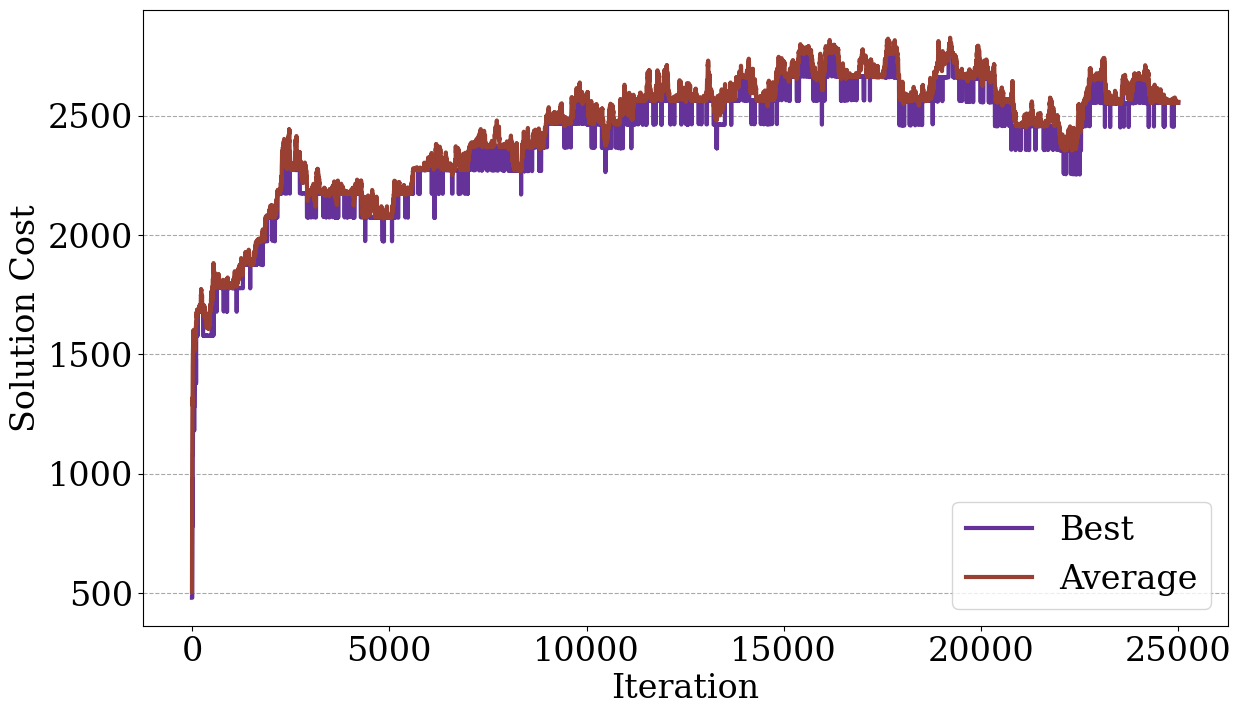

In [57]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

prefix = "basic"
it = 4

pathCWD = os.getcwd() + "/output/"
pathFile = pathCWD + "ga+grasp"+str(it)+"_log_1s_64g_80d.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
pdLog = pd.DataFrame(dataPkt)


fig, ax1 = plt.subplots(figsize=(14, 8))

color1 = '#643299'
color2 = '#994032'
color3 = '#993280'
color4 = '#993242'
color5 = '#853299'
alpha = 0.6

ax1.plot(pdLog['gen'], pdLog['bestCost'], color1, linewidth=3, label='Best', zorder=6)
# ax1.plot(pdLog30['gen'], pdLog30['bestCost'], linewidth=3, label='30% Crossover', zorder=6)
# ax1.plot(pdLog50['gen'], pdLog50['bestCost'], linewidth=3, label='50% Crossover', zorder=6)
# ax1.plot(pdLog70['gen'], pdLog70['bestCost'], linewidth=3, label='70% Crossover', zorder=6)
# ax1.plot(pdLog90['gen'], pdLog90['bestCost'], linewidth=3, label='90% Crossover', zorder=6)
ax1.plot(pdLog['gen'], pdLog['avgCost'], color=color2, linewidth=3, label='Average', zorder=6)
# ax1.plot(pdLog['it'], pdLog['currCost'], color=color2, linewidth=5, alpha=0.8, label='Current', zorder=5)

ax1.set_xlabel("Iteration")
ax1.set_ylabel("Solution Cost")
# ax1.set_ylim(430, 490)
ax1.tick_params(axis='y', which='major')
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
ax1.legend(bars, labels, loc='best')
# fig.suptitle('Solving Time by Number of Virtual Positions')
plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

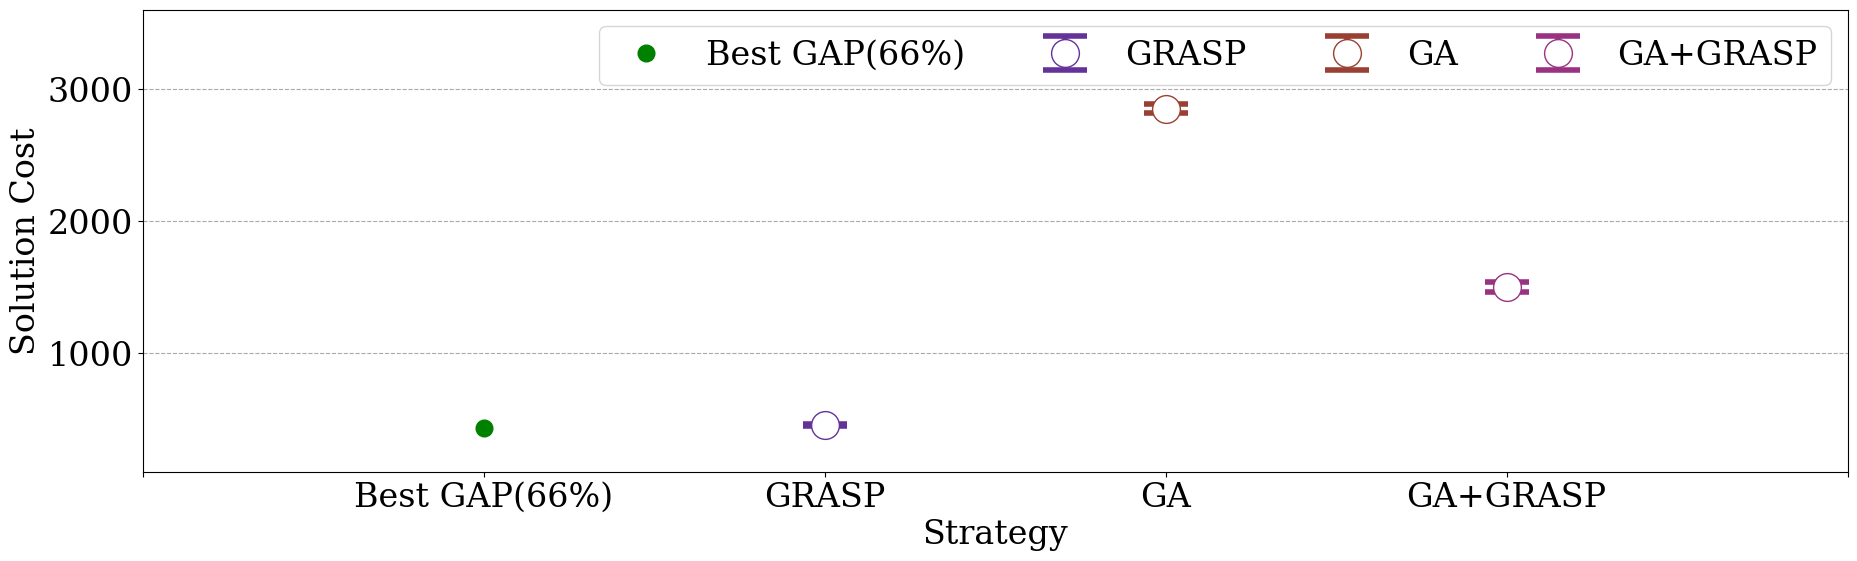

In [62]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import os

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

means_basic = []
error_basic = []
means_half = []
error_half = []
means_smart = []
error_smart = []
indexes = []

pathCWD = os.getcwd() + "/output/"

pathFile = pathCWD + "biobj_gap_solutions.dat"
dataPkt = pd.read_csv(pathFile, sep=",")
dfBest = pd.DataFrame(dataPkt)

dfBest = dfBest.loc[dfBest['numDevices'] == 80]
dfBest = dfBest.loc[dfBest['numVirtualPositions'] == 64]

costs_basic = []
costs_ga_grasp = []
costs_ga70 = []

for i in range(0,30):

    # ---- Random Diversification ----
    pathFile = pathCWD + "grasp" + str(i) + "_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    costs_basic.append(dfLog.loc[dfLog['it'] == 49999]['bestCost'].array)
    
    # ---- Random Diversification ----
    pathFile = pathCWD + "ga+grasp" + str(i) + "_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.drop(index=dfLog.index[:250], axis=0, inplace=True)
    dfLog.sort_values(by=['avgCost'], ascending=True, inplace=True)
    costs_ga_grasp.append(dfLog['avgCost'].iloc[0])
    
    
    pathFile = pathCWD + "random" + str(i) + "_70_log_1s_64g_80d.dat"
    dataPkt = pd.read_csv(pathFile, sep=",")
    dfLog = pd.DataFrame(dataPkt)
    
    dfLog.drop(index=dfLog.index[:250], axis=0, inplace=True)
    dfLog.sort_values(by=['avgCost'], ascending=True, inplace=True)
    costs_ga70.append(dfLog['avgCost'].iloc[0])
    
    

means_basic.append(np.mean(costs_basic))
error_basic.append(np.std(costs_basic)/np.sqrt(len(costs_basic)))

# means_half.append(np.mean(costs_half))
# error_half.append(np.std(costs_half)/np.sqrt(len(costs_half)))

fig, ax1 = plt.subplots(figsize=(22, 6))

color1 = '#643299'
color2 = '#994032'
color3 = '#993280'
color4 = '#993242'
color5 = '#853299'
alpha = 0.6

ax1.errorbar(2, means_basic, error_basic, color=color1, mfc='white', marker='o', markersize=20,
             linestyle='', label='GRASP', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(3, np.mean(costs_ga70), np.std(costs_ga70)/np.sqrt(len(costs_ga70)), color=color2, mfc='white', marker='o', markersize=20,
             linestyle='', label='GA', capsize=16, lw=4, capthick=4, zorder=4)
ax1.errorbar(4, np.mean(costs_ga_grasp), np.std(costs_ga_grasp)/np.sqrt(len(costs_ga_grasp)), color=color3, mfc='white', marker='o', markersize=20,
             linestyle='', label='GA+GRASP', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.errorbar(3, means_half, error_half, color=color3, mec='white', marker='X', markersize=20,
#              linestyle='', label='Smart Diver.', capsize=16, lw=4, capthick=4, zorder=4)
# ax1.errorbar(range(len(means_smart)), means_smart, error_smart, color=color2, mec='white', marker='D', markersize=16,
#              linestyle='', label='Smart', capsize=16, lw=4, capthick=4, zorder=4)
ax1.plot(1, dfBest.loc[dfBest['seed'] == 1]['objective'], linestyle="", color="green", marker="o", markersize=12, label='Best GAP(66%)', zorder=4)

ax1.set_xticks([0,1,2,3,4,5], ["", "Best GAP(66%)", "GRASP", "GA", "GA+GRASP", ""])
ax1.set_xlabel("Strategy")
ax1.set_ylabel("Solution Cost")
ax1.tick_params(axis='y', which='major')
ax1.set_ylim(100, 3600)
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=0)

bars, labels = ax1.get_legend_handles_labels()
plt.legend(loc='best', ncol=4)
# fig.suptitle('Solving Time by Number of Virtual Positions')
# plt.show()
# plt.savefig('fig/fig..pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

   id       x       y     z
0  56  5625.0  4375.0  45.0
1  39  5625.0  6875.0  45.0
2  55  5625.0  5625.0  45.0
3  54  4375.0  4375.0  45.0
4  21  6875.0  8125.0  45.0
5  59  3125.0  5625.0  45.0


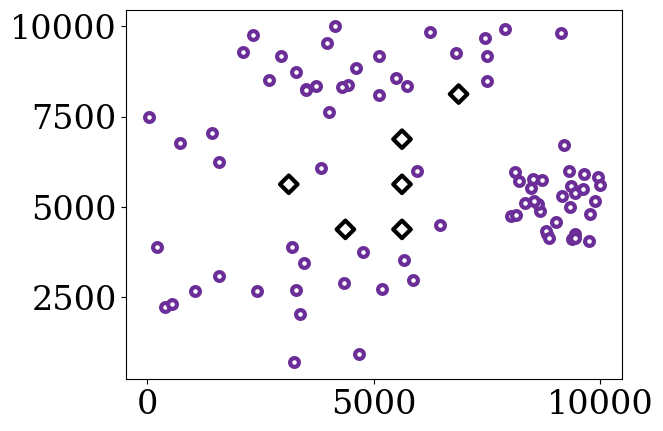

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

columns = ["x", "y", "z"]

pathCWD = os.getcwd()
pathGWPlacement = pathCWD + "/output/test_c2_Placement_1s_64x1Gv_80D.dat"
dataGWPlacement = pd.read_csv(pathGWPlacement, sep=",")
dfGWPlacement = pd.DataFrame(dataGWPlacement)

pathEDPlacement = pathCWD + "/data/endDevices_LNM_Placement_1s+80d.dat"
dataEDPlacement = pd.read_csv(pathEDPlacement, sep=" ", header=None, names=columns)
dfEDPlacement = pd.DataFrame(dataEDPlacement)

print(dfGWPlacement)

fig = plt.plot(figsize=(18, 18))

color1 = '#6B2D97'
color2 = '#96753C'
alpha = 0.9

# plt.annotate(dfEDPlacement['device'][i], (dfEDPlacement['x'][i]-150, dfEDPlacement['y'][i] + 100), zorder=15)
# plt.plot(x[i], y[i], '-', c='grey', zorder=0)

plt.scatter(dfEDPlacement['x'], dfEDPlacement['y'], c="white", edgecolors=color1, linewidths=3, s=40, zorder=10)
plt.scatter(dfGWPlacement['x'], dfGWPlacement['y'], c="None", edgecolors="black", linewidths=3, s=80, marker="D", zorder=10)

# plt.yticks([0, 1000, 2000, 3000, 2000, 5000, 6000, 7000, 8000, 9000, 10000])
# plt.xticks([0, 1000, 2000, 3000, 2000, 5000, 6000, 7000, 8000, 9000, 10000])

plt.savefig('map.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.1)

In [121]:
import numpy as np
from decimal import Decimal
import math

def chance(n):
    return Decimal(math.comb((64*42),n*42)) * 80**(n*42)/80**(64*42)

print(Decimal(80**(64*42)))
print('{:.2E}'.format(Decimal(80**(64*42))))
print('{:.2E}'.format(Decimal(80**(4*42))))
print('{:.2E}'.format(Decimal(math.comb(64*42,4*42) * 80**(4*42))))
print('{:.2E}'.format(chance(4)))
print('{:.2E}'.format(chance(8) + chance(4) + chance(5) + chance (6) + chance(7)))
print('{:.2E}'.format(chance(4) / (chance(8) + chance(4) + chance(5) + chance (6) + chance(7))))


3205420678976414354109428777848393921294930856594998383458157362623209819726595390723597458475865808052952162726128252640859669510823561999044759226077052345966680836095196708104944918011574776963375835220743819241775448155756026647574457956741006639156087838943174801296096150115668342131051294940840128129374397872703050166565488186292247337293086004259407961794226966040646928550439200153787417692574111060697974629902035947834375598633484930162405447280101340750954890594482163473655683205188844372657084431747060239972584203443531629960499433782975530938460554954208136307577485739437377642611599490813154762023452661736053989546124536402959197565128819276400496742941163802047150430798370095418052909702471977302781917040077610604659823064816045697376020894293412633772376971370411344869374976282912842819427920646146656385813293124204647319765986692720150249860276328736696099585687579615396840783830218615153554810663576015809707760508727001255544878749970570552925628597913580431980874611351